## Gradient Boosting - Hauptnutzfläche
Random Forest Model zur Schätzung der Hauptnutzfläche

### Datensatz
Imports & Datensatz laden

In [7]:
from sklearn.ensemble import GradientBoostingRegressor

import package.charts as charts
import package.importer as im
import package.ml_helper as ml_helper

# load dataset
df = im.get_dataset('package/dataset.csv')
X, y = ml_helper.hnf_dataset(df)
# X, y = ml_helper.hnf_dataset(df, upper_percentile='75%')
# X, y = ml_helper.hnf_dataset(df, upper_percentile='50%')
# X, y = ml_helper.hnf_dataset(df, upper_percentile='25%')

      area_total_floor_416  area_main_usage  usage_cluster  \
16                  1846.0           1279.0         WOHNEN   
30                 12418.0           6466.0         WOHNEN   
35                 10370.0           2336.0        BETRIEB   
46                  2828.0           1454.0  KULTUS_KULTUR   
61                 31315.0           7585.0        BETRIEB   
...                    ...              ...            ...   
3017                5543.0           2666.0          BUERO   
3018                3588.0           2231.0   BEHERBERGUNG   
3020                1589.0            855.0         WOHNEN   
3021               19876.0           6762.0     GESUNDHEIT   
3284                6806.0           2789.0     GESUNDHEIT   

                                      nom_usage_main  
16                        WOHNBAUTEN__EFH_REIHEN_LOW  
30                               WOHNBAUTEN__MFH_LOW  
35        GESUNDHEITSBAUTEN__KRANKENHAEUSER_Logistik  
46                                 

### Modell trainieren
Trainieren und testen des Models mit Repeated-Cross-Validation

In [8]:
regr = GradientBoostingRegressor(random_state=0)
scores = ml_helper.cross_validation(regr, X, y)


### Evaluieren
Auswertung des trainierten Models

In [9]:
ml_helper.evaluate_cv_scores(scores)

Evaluation
-------------------------
Fit time: 0.028616
Score time: 0.002457

[test_r2]
mean=0.865006 std=0.068768

[test_neg_mean_absolute_percentage_error]
mean=-0.216309 std=0.030641

[test_neg_root_mean_squared_error]
mean=-1501.436830 std=419.756028

[test_neg_mean_absolute_error]
mean=-626.662280 std=120.112327

[test_max_error]
mean=-10024.536760 std=3329.722926




### Features Importance
Wichtigkeit der Features für das Modell

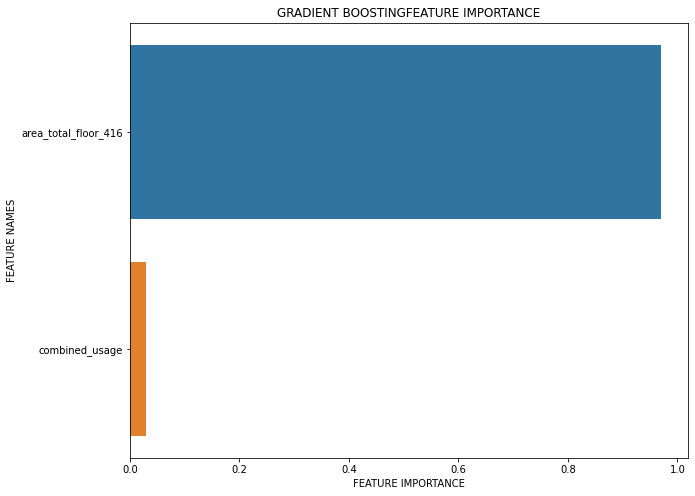

In [10]:
model = regr.fit(X, y)
charts.plot_feature_importance(model.feature_importances_, X.columns, 'GRADIENT BOOSTING')

### Decision Tree
Visualisieren des Desicion Tree

In [11]:
# TODO: Visualize decision tree

### Modell speichern
Serialisieren des Modells für API

In [12]:
model = regr.fit(X, y)
ml_helper.serialize_object(model, 'gradient_boosting_model')

Location: D:\Development\FHNW\ip5-metriken-bauwesen\export\gradient_boosting_model.joblib
